In [17]:
###### check environments ######

import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])

ocid1.tenancy.oc1..aaaaaaaazsst3y4ltnibxw2e56dsmdlwkc7zoshzpkst7hkgfgite4csmhoa
ocid1.datascienceproject.oc1.eu-zurich-1.amaaaaaa2jwq32iapkcl4klg3qulxmpxlgnyxwhf276mb6ukgtdhms5oc3ua
ocid1.saml2idp.oc1..aaaaaaaao4zb7iwgmzbhs3hcvl7qrob453qzrqzs3o2hhl23oczezxmtyz7q/ethlambda@gmail.com
ocid1.tenancy.oc1..aaaaaaaazsst3y4ltnibxw2e56dsmdlwkc7zoshzpkst7hkgfgite4csmhoa
eu-zurich-1


In [18]:
%%bash
###### install libs ######
#pip install matplotlib
#pip install pandas
#pip install seaborn
#pip list
#pip install scikit-learn

In [2]:
###### import libs ######

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import gzip
import pickle
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator

plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['font.size'] = 15
sns.set(color_codes=True)
sns.set(font_scale=1.5)
sns.set_palette("bright")
sns.set_style("whitegrid")

In [19]:
###### check ads env ######

ads.environment.ads_inspect.check_ads_env()

Library         Version    Required
--------------  ---------  ----------
arrow           0.14.7     0.10.0
configparser    4.0.2      3.5.0
ipykernel       5.4.0      5.1.3
pyod            0.8.1      0.7.1
pyOpenSSL       18.0.0     19.0
pytest          4.0.1      5.3.5
pytest-asyncio  0.9.0      0.10.0
six             1.14.0     1.13


In [22]:
####### load data #######

name = 'd_scs'
id_col = "ID"
target_col = "TARGET"

train_name = './d_scs/train_{}.csv'.format(name)
test_name = './d_scs/test_{}.csv'.format(name)

df = pd.read_csv(train_name)
test_df = pd.read_csv(test_name)

print(df.head())
print(df.shape)

print(test_df.head())
print(test_df.shape)

       ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0  102199     2     58                 0.0                      0.0   
1  130805     2     24                 0.0                      0.0   
2  140236     2     25                 0.0                      0.0   
3   15384     2     31                 0.0                      0.0   
4  114392     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                     30.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0      

[0 1]


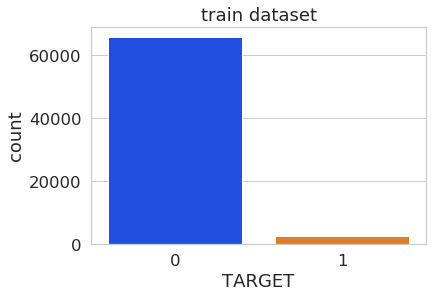

In [23]:
### dataset statistics ######
sns.countplot(x=target_col, data=df)
plt.title("train dataset")
print(df[target_col].unique())

In [25]:
###### train model ######

train = DatasetFactory.open(df).set_target(target_col)
print([train])

# create an automl job
ml_engine = OracleAutoMLProvider(n_jobs=-1, loglevel=logging.ERROR)
oracle_automl = AutoML(training_data = train, provider=ml_engine)

# time budget is in seconds
best_model, baseline = oracle_automl.train(score_metric='roc_auc', time_budget=7200)

[BinaryClassificationDataset(target: TARGET) 68,418 rows, 371 columns]


Training Dataset size,"(68418, 370)"
Validation Dataset size,None
CV,5
Target variable,TARGET
Optimization Metric,roc_auc
Initial number of Features,370
Selected number of Features,322
Selected Features,"[ID, var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13_medio, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var26, ind_var25_0, ind_var25, ind_var29_0, ind_var29, ind_var30_0, ind_var30, ind_var31_0, ind_var31, ind_var32_cte, ind_var32_0, ind_var32, ind_var33_0, ind_var33, ind_var34_0, ind_..."
Selected Algorithm,RandomForestClassifier
End-to-end Elapsed Time (seconds),7256
Selected Hyperparameters,"{'class_weight': 'balanced_subsample', 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 253}"


Rank based on Performance,Algorithm,#Samples,#Features,Mean Validation Score,Hyperparameters,CPU Time
2,RandomForestClassifier_HT,68418,322,0.9058,"{'class_weight': 'balanced', 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 253}",54.9949
3,RandomForestClassifier_HT,68418,322,0.9057,"{'class_weight': None, 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 253}",57.4893
4,RandomForestClassifier_HT,68418,322,0.9057,"{'class_weight': None, 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 252}",57.0020
5,RandomForestClassifier_HT,68418,322,0.9043,"{'class_weight': None, 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 101}",21.4569
6,RandomForestClassifier_HT,68418,322,0.9043,"{'class_weight': None, 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 100}",22.4841
...,...,...,...,...,...,...
191,RandomForestClassifier_ANOVAF_FS,68418,2,0.6886,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",3.1995
192,RandomForestClassifier_ANOVAF_FS,68418,1,0.6674,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",3.0450
193,RandomForestClassifier_MutualInfo_FS,68418,1,0.6450,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",22.6787
194,RandomForestClassifier_HT,68418,322,0.5166,"{'class_weight': None, 'max_features': 0.003105590062111801, 'min_samples_leaf': 0.0031317639243018517, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 5}",0.6372


In [30]:
###### predict test dataset ######

print(test_df.shape)

y_pred = best_model.predict(test_df)
y_true = test_df[target_col]
print(y_true.shape)

test_acc = np.mean(y_pred==y_true)
print("test accuracy = {}".format(test_acc))

import sklearn
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)
test_auc = metrics.auc(fpr, tpr)
print("test auc = {}".format(test_auc))

(7602, 371)
(7602,)
test accuracy = 0.9830307813733228
test auc = 0.7886517846723239


In [31]:
oracle_automl.print_trials(max_rows=129, sort_column='Mean Validation Score')

Algorithm,#Samples,#Features,Mean Validation Score,Hyperparameters,CPU Time
RandomForestClassifier_HT,68418,322,0.9063,"{'class_weight': 'balanced_subsample', 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 253}",64.2220
RandomForestClassifier_HT,68418,322,0.9058,"{'class_weight': 'balanced', 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 253}",54.9949
RandomForestClassifier_HT,68418,322,0.9057,"{'class_weight': None, 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 253}",57.4893
RandomForestClassifier_HT,68418,322,0.9057,"{'class_weight': None, 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 252}",57.0020
RandomForestClassifier_HT,68418,322,0.9043,"{'class_weight': None, 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 101}",21.4569
RandomForestClassifier_HT,68418,322,0.9043,"{'class_weight': None, 'max_features': 0.003105590062111801, 'min_samples_leaf': 1.461603671548423e-05, 'min_samples_split': 2.923207343096846e-05, 'n_estimators': 100}",22.4841
RandomForestClassifier_HT,68418,322,0.8925,"{'class_weight': 'balanced_subsample', 'max_features': 0.777777778, 'min_samples_leaf': 0.00024785547882499805, 'min_samples_split': 0.00125, 'n_estimators': 252}",367.8234
RandomForestClassifier_HT,68418,322,0.8923,"{'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.00024785547882499805, 'min_samples_split': 0.00125, 'n_estimators': 316}",485.6989
RandomForestClassifier_HT,68418,322,0.8923,"{'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.00024785547882499805, 'min_samples_split': 0.00125, 'n_estimators': 319}",482.7195
RandomForestClassifier_HT,68418,322,0.8923,"{'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.00024785547882499805, 'min_samples_split': 0.00125, 'n_estimators': 315}",471.4065


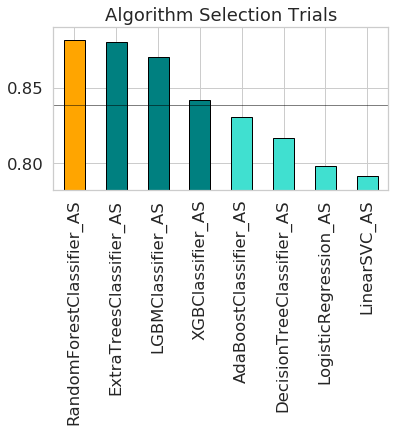

In [32]:
oracle_automl.visualize_algorithm_selection_trials()

In [38]:
###### load kaggle test dataset ######
kaggle_test_name = './d_scs/kaggle-test_{}.csv'.format(name)

kaggle_test_df = pd.read_csv(kaggle_test_name)
kaggle_test_id = np.array(kaggle_test_df[id_col])
#kaggle_test_df = kaggle_test_df.drop([id_col], axis=1)

print(kaggle_test_df.head())
kaggle_test_df.shape

   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   2     2     32                 0.0                      0.0   
1   5     2     35                 0.0                      0.0   
2   6     2     23                 0.0                      0.0   
3   7     2     24                 0.0                      0.0   
4   9     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...

(75818, 370)

In [39]:
###### predict kaggle test dataset ######

kaggle_y_pred = best_model.predict(kaggle_test_df)

assert kaggle_y_pred.shape == kaggle_test_id.shape

print(kaggle_y_pred.shape)
print(kaggle_y_pred[:100])

(75818,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
###### save kaggle prediction ######

kaggle_pred_name = './d_scs/kaggle-test_{}_predictions.csv'.format(name)

kaggle_pred_df = pd.DataFrame({id_col: kaggle_test_id, target_col: kaggle_y_pred})
print(kaggle_pred_df.head())

kaggle_pred_df.to_csv(kaggle_pred_name, index=False)

   ID  TARGET
0   2       0
1   5       0
2   6       0
3   7       0
4   9       0
